In [1]:
%%capture
!pip install pythtb

In [2]:
from pylab import *
from pythtb import *
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from IPython.display import Image

# Aislantes topológicos de orden superior

El descubrimiento de nuevas fases de la materia clasificadas según su topología, es un campo reciente de investigación que está evolucionando, como lo es el caso de las fases aislantes topológicas. Formalmente, los aislantes topológicos son materiales aislantes en su interior (de dimensión d) que permiten estados de conducción en su frontera (de dimensión d > 1). Estos estados de conducción son inusuales, ya que se mantienen a pesar de los efectos de impurezas.
En 2017 se identificaron una nueva clase de aislantes topológicos en dimensiones d > 1 [1-5]. La nueva clase son los aislantes topológicos de orden superior (HOTI, higher-order topological insulators) [6], los cuales presentan estados robustos a desorden que viven en subsistemas de dimensión d > n, donde n > 1. En estos materiales la estructura de banda electrónica se asemeja a un aislante de banda común, con el nivel de fermi comprendido entre las bandas de conducción y de valencia.
En un sistema tridimensional los aislantes topológicos de orden dos presentan estados que conducen en una dimensión, mientras que los aislantes topológicos de orden tres presentan estados confinados en puntos en la superficie del material. Imaginemos un bloque de material con forma de cubo, si se tratara de un aislante topológico típico, los estados conductores de frontera se ubicarán en las caras, mientras que un aislante topológico de orden dos los estados se encontrarán en las aristas y en los aislantes topológicos de orden tres estarán confinados en los vértices [7]


Un modelo concreto para un HOTI 3D se define a través de un Hamiltoniano de 4 bandas, estudiado por F.
Schindler et al. El sistema de estudio está protegido por las simetría $C_4^zT$, y tiene la forma:



\begin{align}
H_4({k}) = &\bigg(  \mu_0+\Theta \sum_i\cos (k_i a)  \bigg)\tau_z\sigma_0 +\Delta_1\sum_i \sin (k_i a)\tau_x\sigma_i \nonumber +\Delta_2 \big[\cos (k_x a)-\cos (k_y a)\big]\tau_y\sigma_0\ 
\end{align}

Donde los primeros dos términos corresponden a un aislante topologico tridimensional con parámetros μ0, Θ y Δ1. Mientras que el tercer término, Δ2, será aquel que rompa la simetría de inversión temporal. La geometría en la cual está definido el Hamiltoniano es una red cúbica con constante de red a, la cual se consideró igual a la unidad.

Nuestro sistema de estudio es una aleación de SnTe con simetría de sal de roca, a continuación se muestra la celda unitaria. 

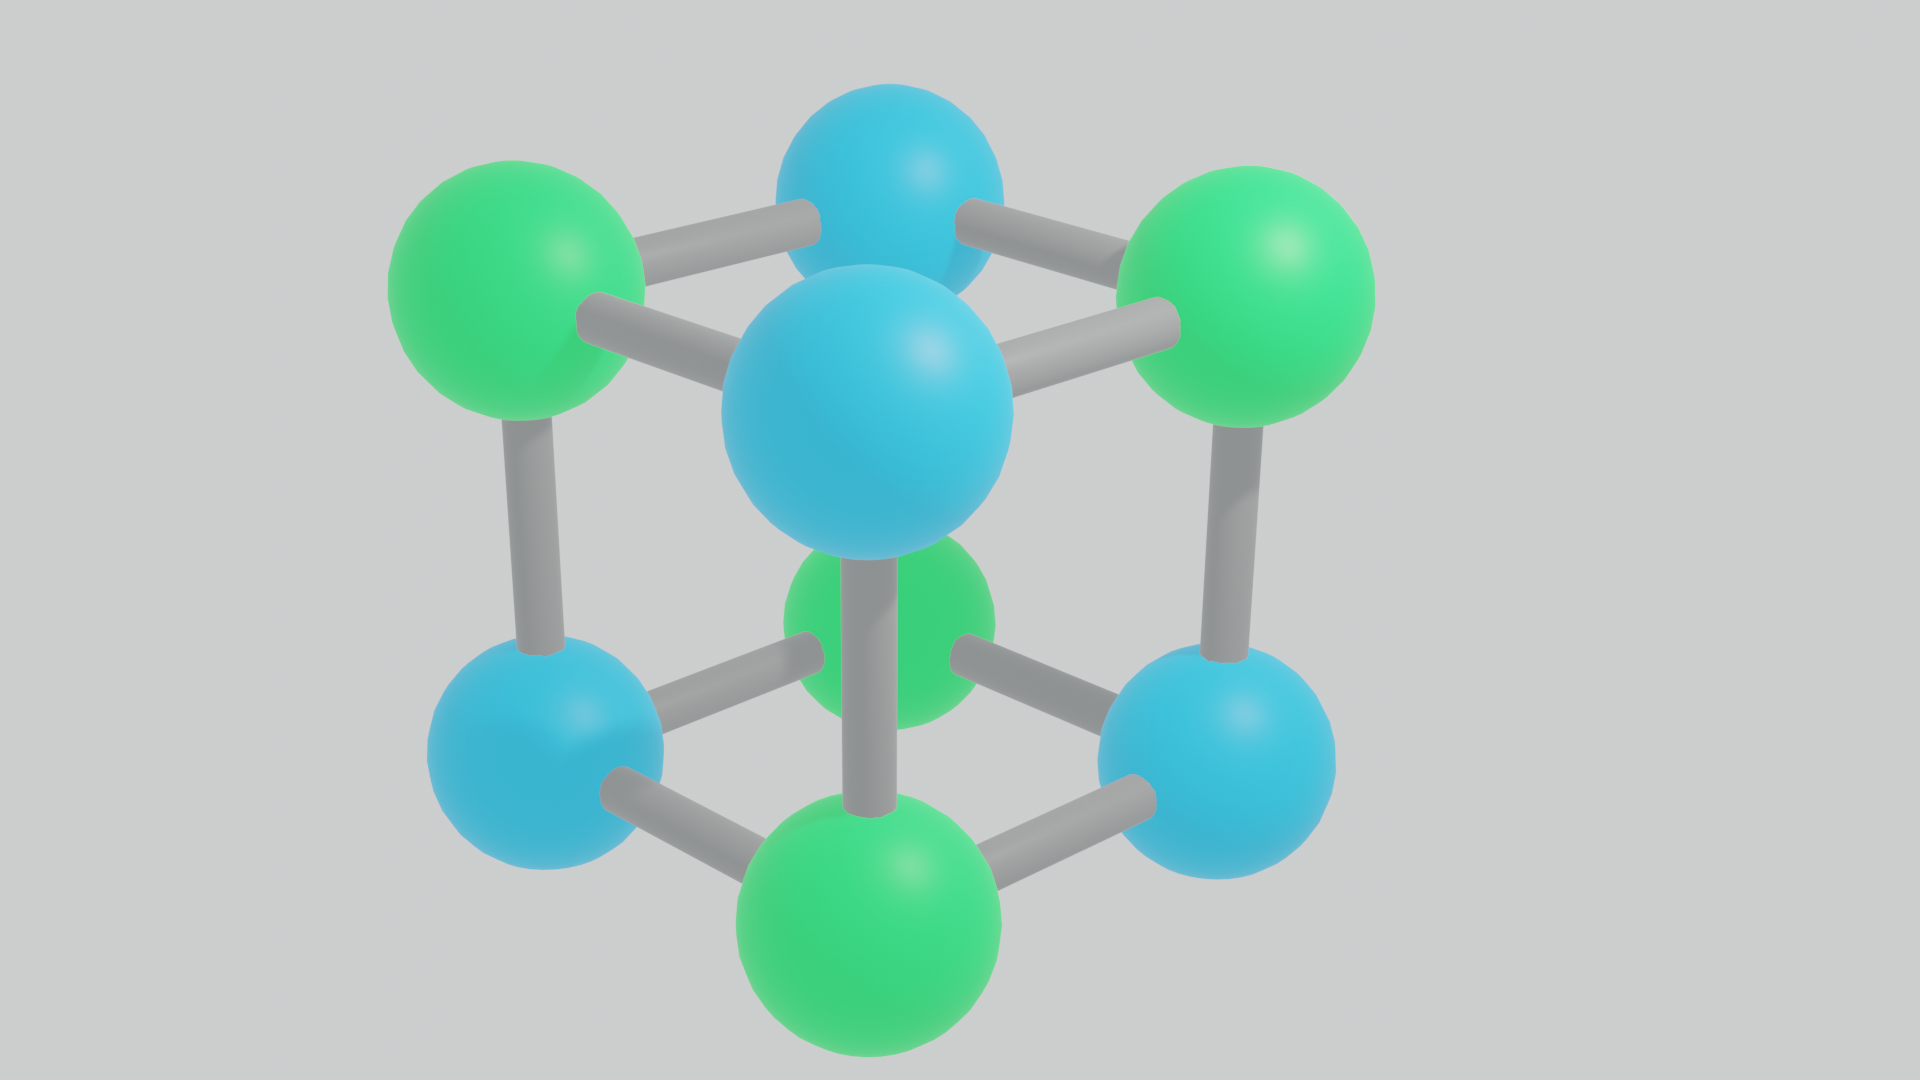

In [7]:
Image(filename = "SnTe.png", width = 400)

Para estudiar el modelo, nos apoyamos en la librería de python conocido como tight binding para resolver el Hamiltoniano y lograr reproducir
nuestros espectros de energía. El modelo es descrito por una matriz de 4x4: 
    
\begin{align}
H = \left[ \begin{array}{cccc}
\mu_0 + Θ/2\big(e^{ikx} + e^{-ikx} + e^{iky} + e^{-iky} +e^{ikz} + e^{-ikz}\big)
& Δ1/2i\big(e^{ikz} - e^{-ikz}\big) -iΔ2/2\big(e^{ikx} + e^{-ikx}-e^{iky} - e^{-iky}\big) & 0                    
&  Δ1/2i\big(e^{ikx} - e^{-ikx}\big) -Δ1/2\big(e^{iky} - e^{-iky}\big)             \\
Δ1/2i\big(e^{ikz} + e^{-ikz}\big) +iΔ2/2\big(e^{ikx} + e^{-ikx} -e^{iky} - e^{-iky}\big) & -\mu_0 - Θ/2\big(e^{ikx} + e^{-ikx} + e^{iky} + e^{-iky}+ e^{ikz} + e^{-ikz}\big)   & Δ1/2i\big(e^{ikx} + e^{-ikx}\big) -Δ1/2\big(e^{iky} - e^{-iky}\big)      & 0 \\
0                      & Δ1/2i\big(e^{ikx} - e^{-ikx}\big) +Δ1/2\big(e^{iky} - e^{-iky}\big)   & \mu_0 + Θ/2\big(e^{ikx} + e^{-ikx} + e^{iky} + e^{-iky}+ e^{ikz} + e^{-ikz}\big) &  -Δ1/2i\big(e^{ikz} - e^{-ikz}\big) -iΔ2/2\big(e^{ikx} - e^{-ikx} +e^{iky} - e^{-iky}\big) \\
 Δ1/2i\big(e^{ikx} - e^{-ikx}\big) +Δ1/2\big(e^{iky} - e^{-iky}\big)          & 0   &    -Δ1/2i\big(e^{ikz} - e^{-ikz}\big) +iΔ2/2\big(e^{ikx} + e^{-ikx} -e^{iky} - e^{-iky}\big)               &  -\mu_0 - Θ/2\big(e^{ikx} + e^{-ikx} + e^{iky} + e^{-iky}+ e^{ikz} + e^{-ikz}\big)  \\
\end{array}\right]
\end{align}



In [8]:
lat=[[1.0,0.0,0.0],[0.0,1.0,0.0],[0.0,0.0,1.0]] #Vectores de red
orb = [[0.0,0.0,0.0],[1/4,1/4,1/4],[1/2,1/2,1/2],[3/4,3/4,3/4]] #posiciones

In [9]:
#Definimos los parámetros
μ0  = 2.0
θ  = 1.0
Δ1 = 1.0
Δ2 = 1.0

In [10]:
my_model = tb_model(3,3,lat,orb)  # modelo tridimensional  tight-binding 

In [11]:
my_model.set_sites([μ0,-μ0,μ0,-μ0]) # términos en la diagonal

In [12]:
my_model.set_hop( θ/2, 0, 0, [1, 0, 0]) # hoppings 
my_model.set_hop( θ/2, 0, 0, [0, 1, 0])
my_model.set_hop( θ/2, 0, 0, [0, 0, 1])

my_model.set_hop( -θ/2, 1, 1, [1, 0, 0])
my_model.set_hop( -θ/2, 1, 1, [0, 1, 0])
my_model.set_hop( -θ/2, 1, 1, [0, 0, 1])

my_model.set_hop( θ/2, 2, 2, [1, 0, 0])
my_model.set_hop( θ/2, 2, 2, [0, 1, 0])
my_model.set_hop( θ/2, 2, 2, [0, 0, 1])

my_model.set_hop(-θ/2, 3, 3, [1, 0, 0])
my_model.set_hop(-θ/2, 3, 3, [0, 1, 0])
my_model.set_hop(-θ/2, 3, 3, [0, 0, 1])

my_model.set_hop(  Δ1/(2J), 0, 1, [ 0,  0,  1])
my_model.set_hop(  -Δ1/(2J), 0, 1, [ 0,  0, -1])

my_model.set_hop( -(1J*Δ2)/2, 0, 1, [ 1,  0,  0])
my_model.set_hop( -(1J*Δ2)/2, 0, 1, [-1,  0,  0])

my_model.set_hop( +(1J*Δ2)/2, 0, 1, [ 0,  1,  0])
my_model.set_hop( +(1J*Δ2)/2, 0, 1, [ 0, -1,  0])

my_model.set_hop(  Δ1/(2J), 0, 3, [ 1,  0,  0])
my_model.set_hop(  -Δ1/(2J), 0, 3, [-1,  0,  0]) 

my_model.set_hop(    -Δ1/2, 0, 3, [ 0,  1,  0])
my_model.set_hop(    +Δ1/2, 0, 3, [ 0, -1,  0])

my_model.set_hop(  Δ1/(2J), 1, 2, [ 1,  0,  0]) 
my_model.set_hop(  -Δ1/(2J), 1, 2, [-1,  0,  0])

my_model.set_hop(    -Δ1/2, 1, 2, [ 0,  1,  0])
my_model.set_hop(    +Δ1/2, 1, 2, [ 0, -1,  0])

my_model.set_hop(  +(1J*Δ2)/2, 3, 2, [ 1,  0,  0])
my_model.set_hop(  +(1J*Δ2)/2, 3, 2, [-1,  0,  0])

my_model.set_hop( -(1J*Δ2)/2, 3, 2, [ 0,  1,  0])
my_model.set_hop( -(1J*Δ2)/2, 3, 2, [ 0, -1,  0])

my_model.set_hop(  -Δ1/(2J), 3, 2, [ 0,  0,  1])
my_model.set_hop(  +Δ1/(2J), 3, 2, [ 0,  0, -1])

In [13]:
my_model.display() # print tight-binding model


---------------------------------------
report of tight-binding model
---------------------------------------
k-space dimension           = 3
r-space dimension           = 3
number of spin components   = 1
periodic directions         = [0, 1, 2]
number of orbitals          = 4
number of electronic states = 4
lattice vectors:
 #  0  ===>  [     1.0 ,     0.0 ,     0.0 ]
 #  1  ===>  [     0.0 ,     1.0 ,     0.0 ]
 #  2  ===>  [     0.0 ,     0.0 ,     1.0 ]
positions of orbitals:
 #  0  ===>  [     0.0 ,     0.0 ,     0.0 ]
 #  1  ===>  [    0.25 ,    0.25 ,    0.25 ]
 #  2  ===>  [     0.5 ,     0.5 ,     0.5 ]
 #  3  ===>  [    0.75 ,    0.75 ,    0.75 ]
site energies:
 #  0  ===>       2.0
 #  1  ===>      -2.0
 #  2  ===>       2.0
 #  3  ===>      -2.0
hoppings:
<  0 | H |  0 + [  1 ,  0 ,  0 ] >     ===>      0.5 +     0.0 i
<  0 | H |  0 + [  0 ,  1 ,  0 ] >     ===>      0.5 +     0.0 i
<  0 | H |  0 + [  0 ,  0 ,  1 ] >     ===>      0.5 +     0.0 i
<  1 | H |  1 + [  1 ,  0 ,

In [14]:
# camino en el espacio recíproco
path=[ [ 0.0, 0.0 ,0.0], # Gamma
        [ 0.5, 0.0 ,0.0], # X
        [ 0.5, 0.5 ,0.0], # XY
        [ 0.0, 0.5, 0.0], # Y
        [ 0.0, 0.5, 0.5], # YZ
        [ 0.0, 0.0, 0.5], # Z
        [ 0.0, 0.0, 0.0] ]
k_label=(r'$\Gamma$',r'$X$',r'$XY$', r'$Y$',r'$YZ$',r'$Z$',r'$\Gamma$')
(k_vec,k_dist,k_node)=my_model.k_path(path,1001, report=False)
evals=my_model.solve_all(k_vec) # Eigenvalores del Hamiltoniano para cada punto de k_vec

In [15]:
Ek,U = my_model.solve_all(k_vec,eig_vectors=True)

In [16]:
shape(Ek)

(4, 1001)

Done.



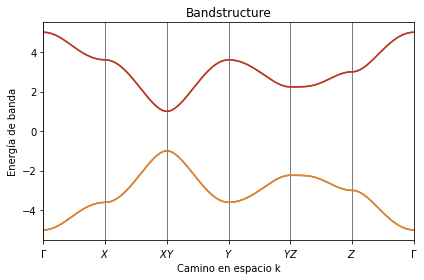

In [17]:
fig, ax = plt.subplots()
ax.set_title("Bandstructure")
ax.set_ylabel("Band energy")

# Límites de gráfica
ax.set_xlim(k_node[0],k_node[-1])
# Colocar etiquetas
ax.set_xticks(k_node)
ax.set_xticklabels(k_label)
# agregar líneas verticales 
for n in range(len(k_node)):
  ax.axvline(x=k_node[n],linewidth=0.5, color='k')


# Graficar bandas
for n in range(4):
  ax.plot(k_dist,evals[n])
# Colocar título
#ax.set_title("Checkerboard band structure")
ax.set_xlabel("Camino en espacio k")
ax.set_ylabel("Energía de banda")
# Guardar gráfica en formato png
fig.tight_layout()
fig.savefig('Estructura de bandas.png')

print('Done.\n')


# save as PDF
#fig.tight_layout()


**Modelo finito**

Graficamos el espectro de energía para un sistema finito en x y y. Observamos que hay un cruce de los estados de borde de nuestro sistema los cuales se corroborarán mediante una medida de localización también conocida como el IPR. 

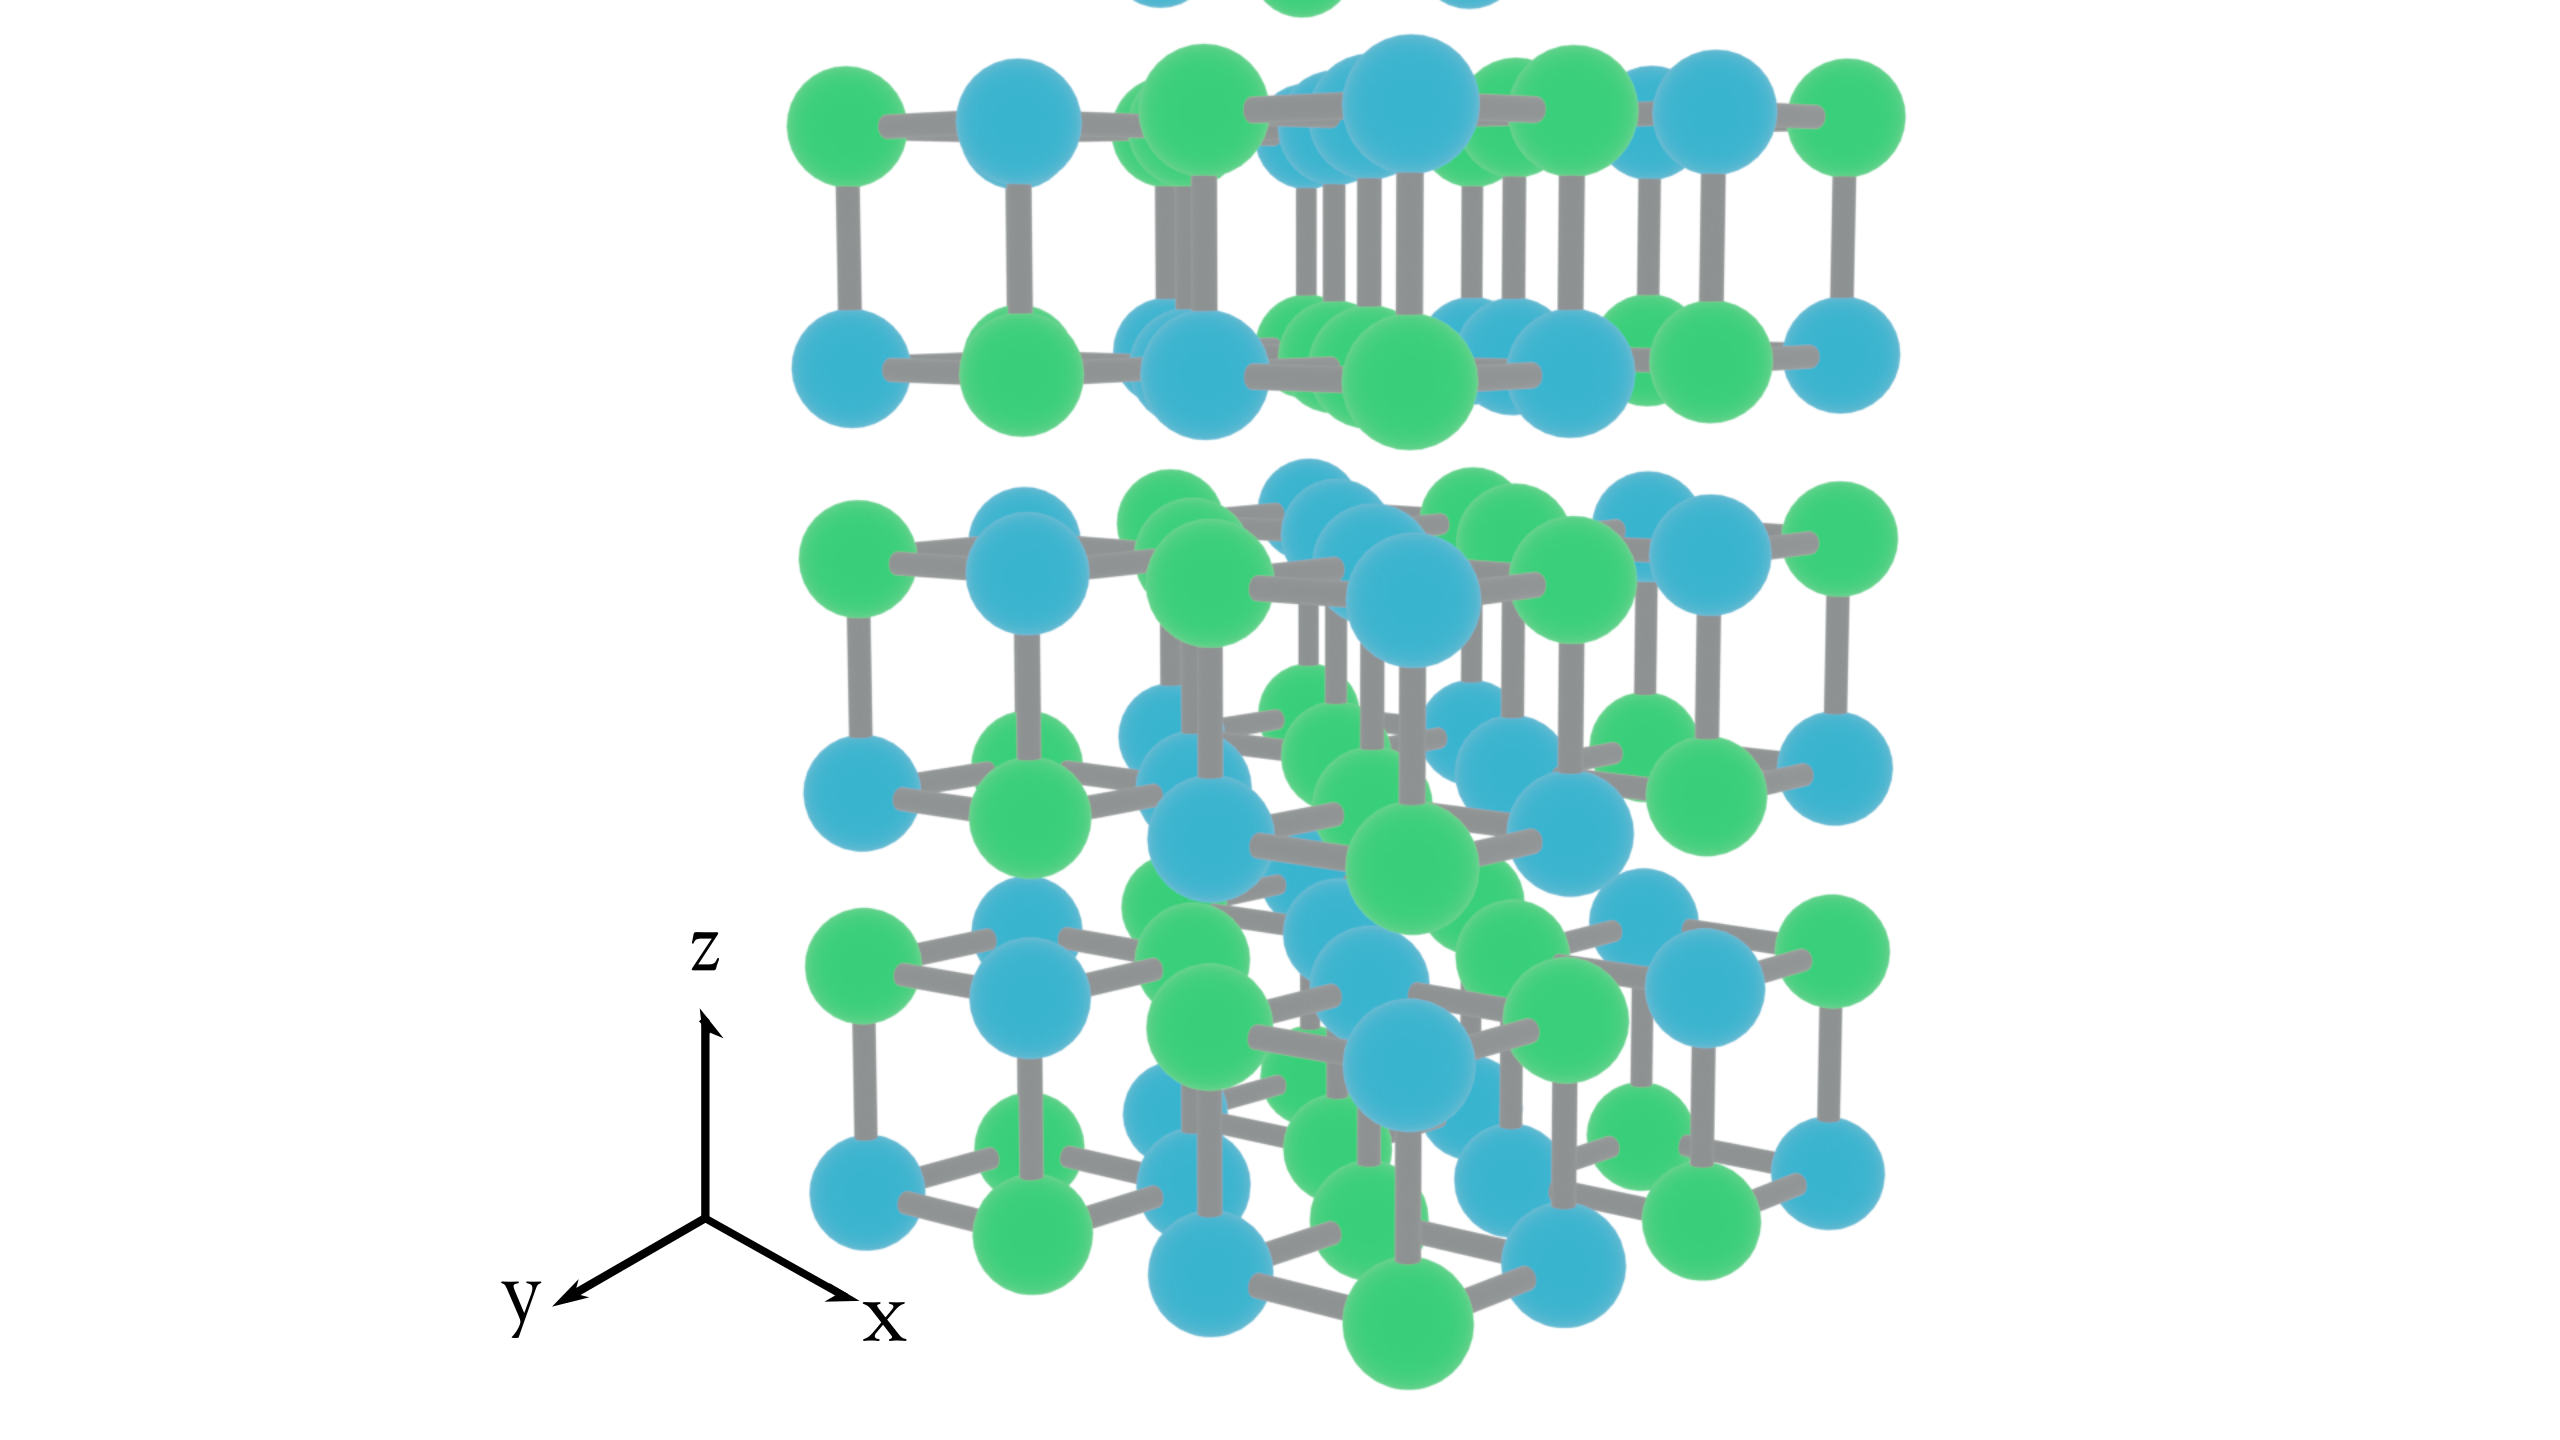

In [20]:
Image(filename = "bitmap.png", width = 400)
#Sistema finito

In [21]:
len_0=10
len_1=10
len_2=10

slab1= my_model.cut_piece(len_1,1,glue_edgs=False)
slab2= slab1.cut_piece(len_0,0,glue_edgs=False)

k = [ [0.0], [1.0] ]
(k_vec,k_dist,k_node) = slab2.k_path(k,101,report=False)
k_label=[r"$0$",r"$\pi$", r"$2\pi$"]

Ek,U = slab2.solve_all(k_vec,eig_vectors=True)


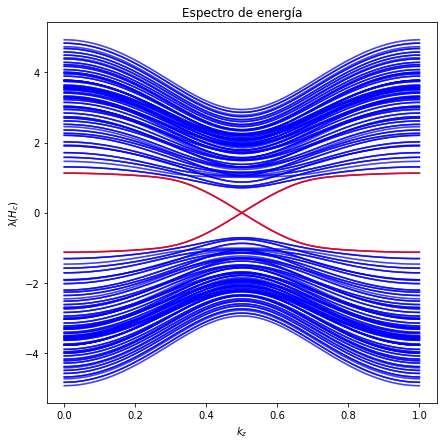

In [22]:
fig,ax=plt.subplots(figsize=(7,7))
for n in range(len(Ek)):
    ax.plot( k_dist, Ek[n], 'b',alpha=0.5)
ax.plot( k_dist, Ek[len(Ek)//2 ], 'r')
ax.plot( k_dist, Ek[len(Ek)//2 -1] , 'r')
ax.set_title("Espectro de energía")
ax.set_xlabel("$k_z$")
ax.set_ylabel("λ($H_c$)")
fig.savefig("HOTI.png")

Exploración del espectro energético según el diagrama de fase


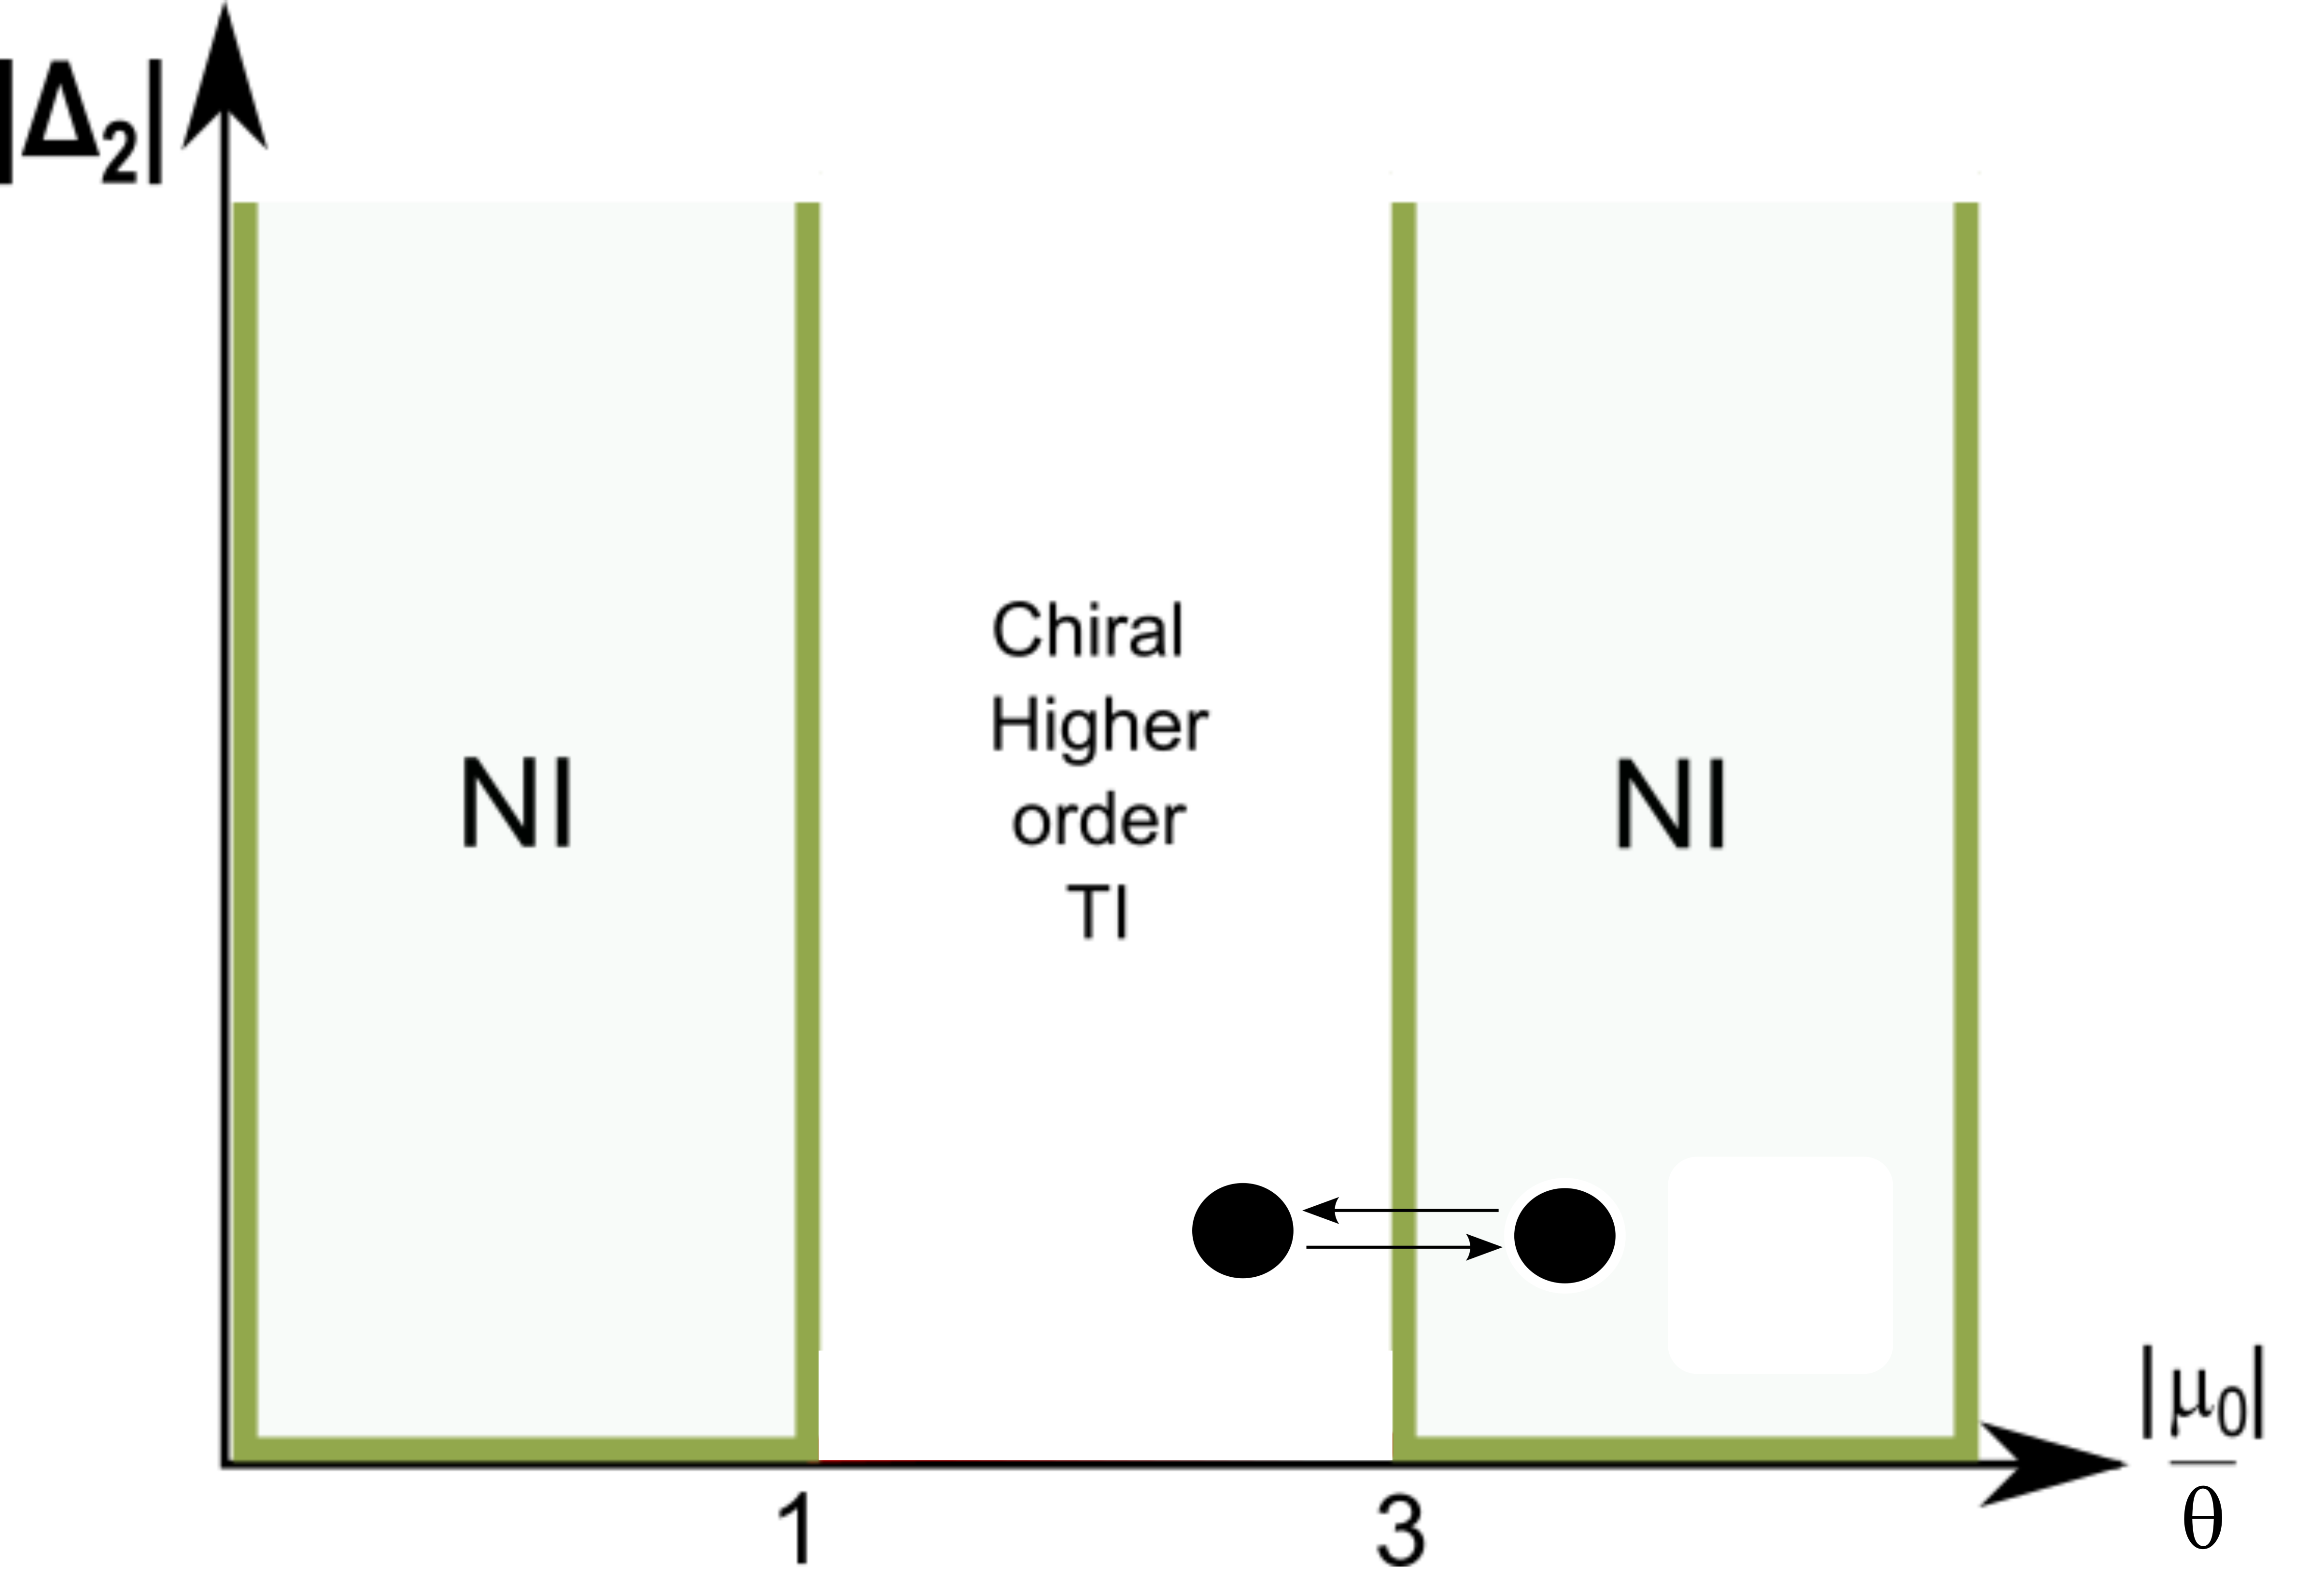

In [23]:
Image(filename = "anfvc.png", width = 400)

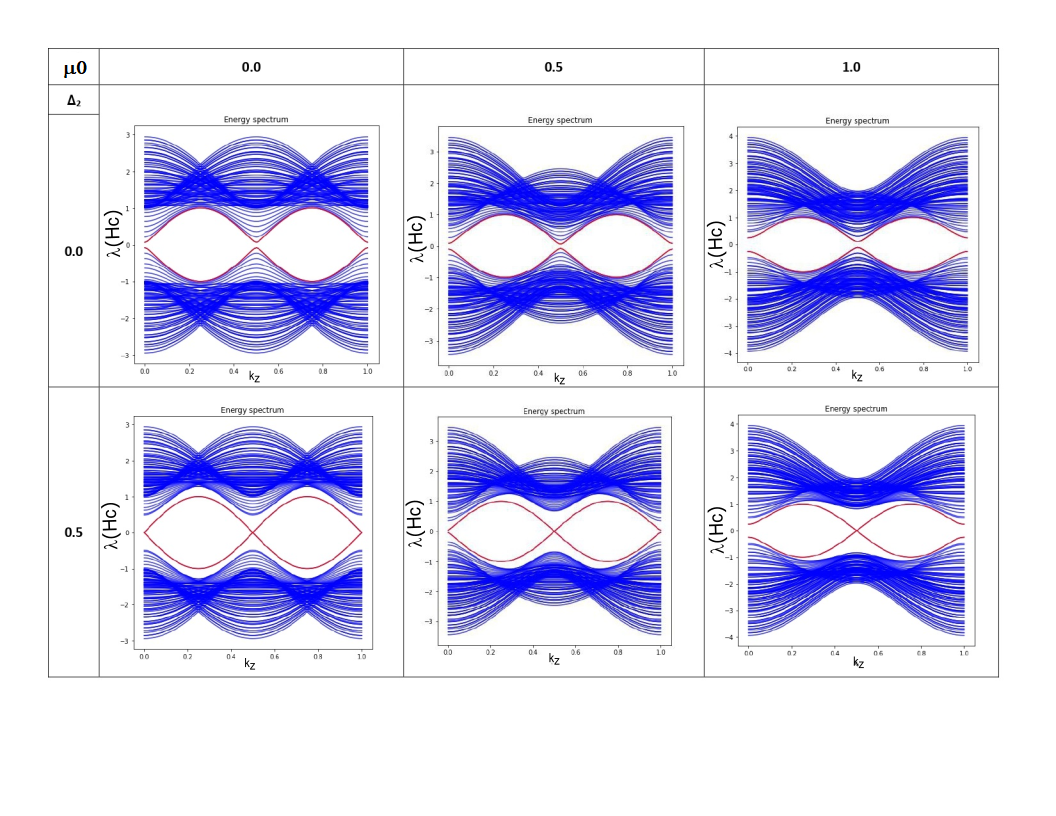

In [24]:
Image(filename = "1-TI.png", width = 400)

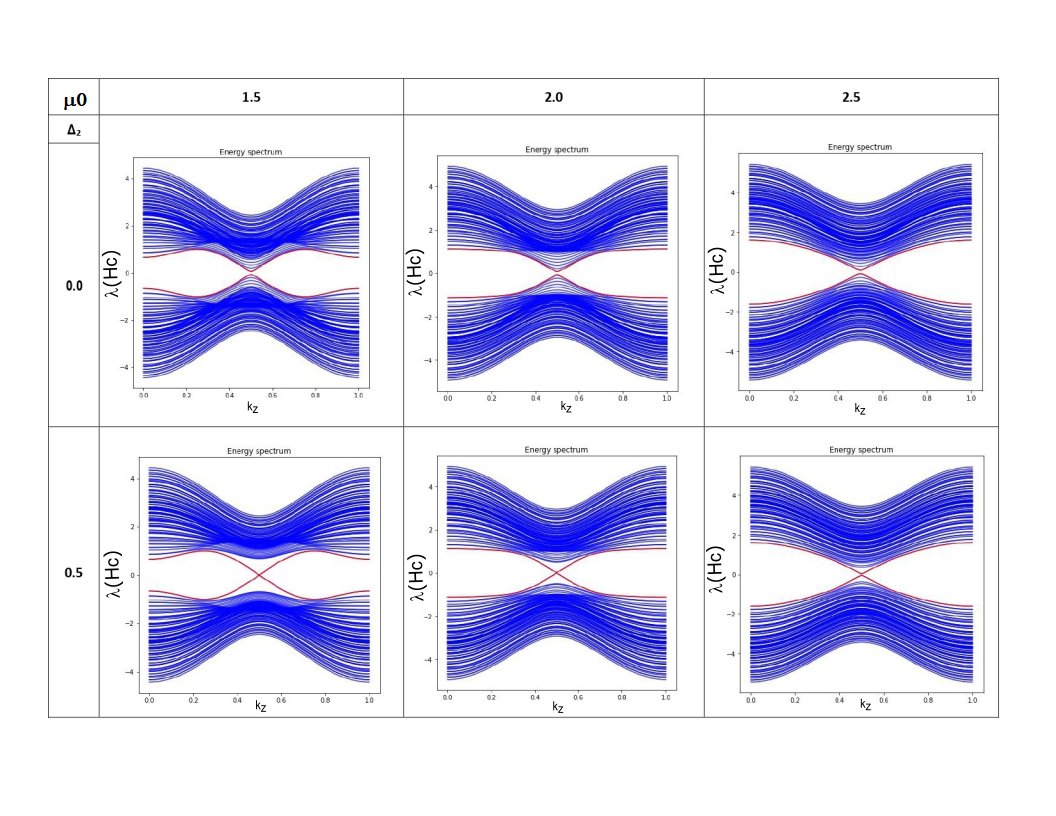

In [25]:
Image(filename = "2-HOTI.png", width = 400)

**INVERSE PARTICIPATION RATIO (IPR)**

IPR es la integral (o suma para el tamaño del sistema finito) sobre el cuadrado de la densidad en algún espacio.  El valor más pequeño del IPR corresponde a un estado completamente deslocalizado y los valores cercanos a 1 corresponden a estados localizados. 

Los estados localizados y deslocalizados (extendidos) en el marco de la física de la materia condensada corresponden a estados aislantes y metálicos, respectivamente, si uno imagina que un electrón en una red no puede moverse en el cristal (función de onda localizada, IPR está cerca de uno) o poder moverse (estado extendido, IPR es cercano a cero).

In [ ]:
#eigenvalores e identificar sus índices para evaluar IPR
nbands, nkpts, nsites = shape(U)
#primer índice -->  eigenvalor, n índice de la banda
#segundo índice -> valor de k, vector de onda o momento cristalino
#tercer índice --> sitio de red 
IPR = []
for band in range(nbands):
  IPRband= []
  for nk in range(nkpts):
    eigenvector = U [band,nk]
    suma2 = vdot (eigenvector , eigenvector)
    suma4 = vdot (eigenvector*eigenvector , eigenvector*eigenvector)
    IPRband.append( real (suma4/suma2) ) 
  IPR.append(IPRband)
IPR = array(IPR)
print(shape(IPR))



(400, 101)


In [ ]:
print ( "IPR.máx", IPR.max() )
print("IPR.min",IPR.min())

IPR.máx 0.08751778677754266
IPR.min 0.003418433238490224


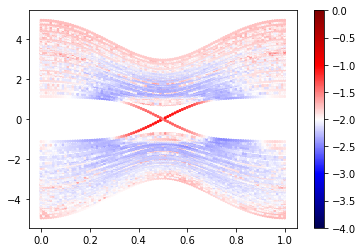

In [ ]:
fig,ax = plt.subplots()
for band in range(nbands):
  grafica = ax.scatter (k_dist, Ek[band], c=log10(IPR[band]),s=3,cmap=cm.seismic, vmin=-4, vmax=0)
fig.colorbar(grafica)
fig.savefig("IPR.png")